In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
from mafContrib import PeriodicStarMetric 

In [2]:
outDir ='starfit'
dbFile = 'baseline2018a.db'
opsimdb = db.OpsimDatabase(dbFile)
resultsDb = db.ResultsDb(outDir=outDir)

In [3]:
# Set RA, Dec for a single point in the sky. in radians.

# Both in degrees 
ra = 0.
dec = -20.

metric = PeriodicStarMetric()
slicer = slicers.UserPointsSlicer(ra,dec,lonCol='fieldRA',latCol='fieldDec')
slicer.slicePoints['distMod'] = np.array([5.])
sql = 'night < 1400'
bundle = metricBundles.MetricBundle(metric,slicer,sql)
bg =  metricBundles.MetricBundleGroup({0:bundle}, opsimdb,
                                      outDir=outDir, resultsDb=resultsDb)

In [4]:
bg.runAll()

Querying database SummaryAllProps with constraint night < 1400 for columns ['fiveSigmaDepth', 'filter', 'observationStartMJD', 'fieldRA', 'fieldDec']
Found 902884 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [5]:
bundle.metricValues

masked_array(data = [0.93],
             mask = [False],
       fill_value = -666.0)

In [6]:
metric = PeriodicStarMetric(nMonte=10)
nside = 4
# Let's see if we can turn on the dithering by specifying dithered columns
slicer = slicers.HealpixSlicer(nside,lonCol='hexDitherFieldPerNightRa',
                               latCol='hexDitherFieldPerNightDec')
# Let's make the distance modulus vary with healpix ID.
distMod = np.arange(0.,slicer.slicePoints['dec'].size)
distMod = distMod/distMod.max()*12.
slicer.slicePoints['distMod'] = distMod

sql = 'night < 1400'
bundle = metricBundles.MetricBundle(metric,slicer,sql)
bg =  metricBundles.MetricBundleGroup({0:bundle}, opsimdb,
                                      outDir=outDir, resultsDb=resultsDb)

Healpix slicer using NSIDE=4, approximate resolution 879.484521 arcminutes


Querying database SummaryAllProps with constraint night < 1400 for columns ['fiveSigmaDepth', 'filter', 'observationStartMJD', 'fieldRA', 'fieldId', 'night', 'fieldDec']
Found 902884 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "night < 1400" constraint now.
monopole: 0.629094  dipole: lon: 96.2743, lat: 81.5326, amp: 0.560848
Plotting complete.


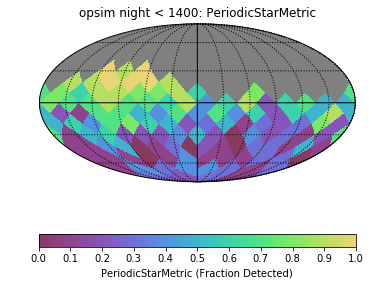

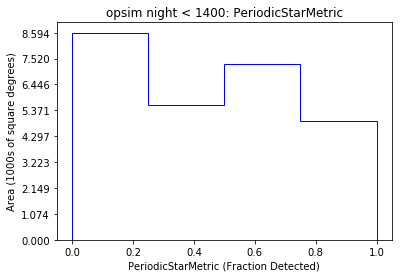

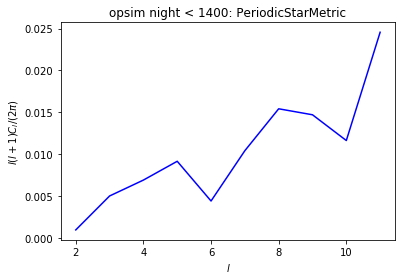

In [7]:
bg.runAll()
bg.plotAll(closefigs=False)